Grupo 1 – Distribución de Edades de los Clientes
Teoría y Fundamento del KPI:
La edad es un factor clave en marketing porque define segmentos de consumo. Los jóvenes tienden a gastar en productos distintos a los adultos mayores. Un análisis de la distribución de edades nos permite identificar el público objetivo predominante y ajustar estrategias (ejemplo: redes sociales para jóvenes vs. email marketing para adultos).
Lo que deben lograr en el dashboard:
Mostrar un histograma claro de la distribución de edades.
Identificar cuál es el rango de edad más común en la base de clientes.
Explicar qué significa esto para las estrategias de marketing (ejemplo: campañas dirigidas a clientes de 30–40 años si es el rango mayoritario).

In [47]:
#importando librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date


In [40]:
#Cargando DataSet
df = pd.read_excel("C:/Users/ELVIS ROSADO/OneDrive/Desktop/Exploracion Pandas/marketing_campaign.xlsx")

In [ ]:
# Para visualizar si cargo bien
#  filas y columnas
print(df.shape)
# primeras 5 filas
print(df.head())

In [42]:
#Convirtiendo en edad y agregando al dateframe
# Obteniendo el año actual
ano_actual= date.today().year

#Creando la columna Edad, la cual es igual al año actual - Menos el año de nacimiento
df["Edad"] = ano_actual - df["Year_Birth"]

#Imprimo la edad y  hago un resumen estadistico de la columna edad
print(df["Edad"])
print(df["Edad"].describe())

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Edad, Length: 2240, dtype: int64
count    2240.000000
mean       56.194196
std        11.984069
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: Edad, dtype: float64


In [43]:
#Punto 2. Identificar cuál es el rango de edad más común en la base de clientes.
#Agrupando por intervalos de edades y contando  los clientes por rangos 
rango_edad = pd.cut(df["Edad"], bins=[18,30,40,50,60,70,80,90,150]) 
distribucion_edad = rango_edad.value_counts().sort_index()

print("Distribución por rangos de edad:")
print(distribucion_edad)

rango_comun = distribucion_edad.idxmax()
cantidad_maxima = distribucion_edad.max()

total_clientes = distribucion_edad.sum()
porcentaje_max = (cantidad_maxima / total_clientes) * 100


print(f"\nRango con más clientes: {rango_comun} \n{cantidad_maxima} clientes, lo cual representa un ({porcentaje_max:.2f}%)")

Distribución por rangos de edad:
Edad
(18, 30]       7
(30, 40]     214
(40, 50]     557
(50, 60]     676
(60, 70]     467
(70, 80]     300
(80, 90]      16
(90, 150]      3
Name: count, dtype: int64

Rango con más clientes: (50, 60] 
676 clientes, lo cual representa un (30.18%)


In [44]:
# Usando el rango de edad que ya se definio
rango_edad = pd.cut(df["Edad"], bins=[18,30,40,50,60,70,80,90,150])
df["Rango_Edad"] = rango_edad

# Columnas de productos
productos = ["MntWines", "MntFruits", "MntMeatProducts", 
                  "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

# Agrupar por rango de edad y sumar los consumos
consumo_por_edad = df.groupby("Rango_Edad")[productos].sum()

for rango, row in consumo_por_edad.iterrows():
    producto_mas = row.idxmax()
    valor_mas = row.max()
    producto_menos = row.idxmin()
    valor_menos = row.min()

    print(f"Rango de edad: {rango}")
    print(f"Producto más consumido: {producto_mas} = {valor_mas}")
    print(f"Producto menos consumido: {producto_menos} = {valor_menos}")
   

Rango de edad: (18, 30]
Producto más consumido: MntMeatProducts = 1631
Producto menos consumido: MntFruits = 117
Rango de edad: (30, 40]
Producto más consumido: MntWines = 55480
Producto menos consumido: MntSweetProducts = 6648
Rango de edad: (40, 50]
Producto más consumido: MntWines = 135284
Producto menos consumido: MntFruits = 13892
Rango de edad: (50, 60]
Producto más consumido: MntWines = 192663
Producto menos consumido: MntFruits = 15971
Rango de edad: (60, 70]
Producto más consumido: MntWines = 169924
Producto menos consumido: MntSweetProducts = 12986
Rango de edad: (70, 80]
Producto más consumido: MntWines = 115426
Producto menos consumido: MntFruits = 8012
Rango de edad: (80, 90]
Producto más consumido: MntWines = 9837
Producto menos consumido: MntGoldProds = 463
Rango de edad: (90, 150]
Producto más consumido: MntWines = 778
Producto menos consumido: MntSweetProducts = 68


C:\Users\ELVIS ROSADO\AppData\Local\Temp\ipykernel_17152\2788232651.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consumo_por_edad = df.groupby("Rango_Edad")[productos].sum()


In [ ]:
#Script generado del rango mas consumido
top_global = consumo_por_edad.sum().idxmax()
print(f"\nEn general, el producto más consumido por todos los rangos es: {top_global}")

---------------------------------PARTE GRAFICA----------------------

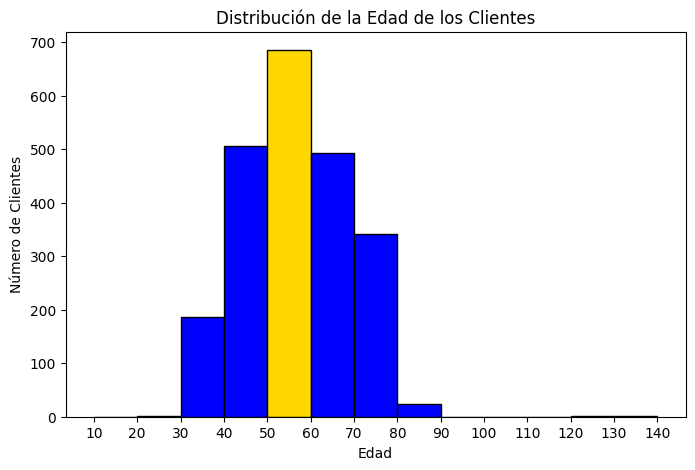

In [45]:
#Punto 1. Mostrar un histograma claro de la distribución de edades
#Creando un histograma

bins= range(10, 150, 10)
counts, edges = np.histogram(df["Edad"], bins=bins)
max_index = counts.argmax()
colors = ['blue' if i != max_index else 'gold' for i in range(len(counts))]

plt.figure(figsize=(8,5))
plt.bar(edges[:-1], counts, width=10, edgecolor='black', color=colors, align='edge')
plt.title("Distribución de la Edad de los Clientes")
plt.xlabel("Edad")
plt.ylabel("Número de Clientes")
plt.xticks(bins)  # para que se vea cada límite de 10 años
plt.show()

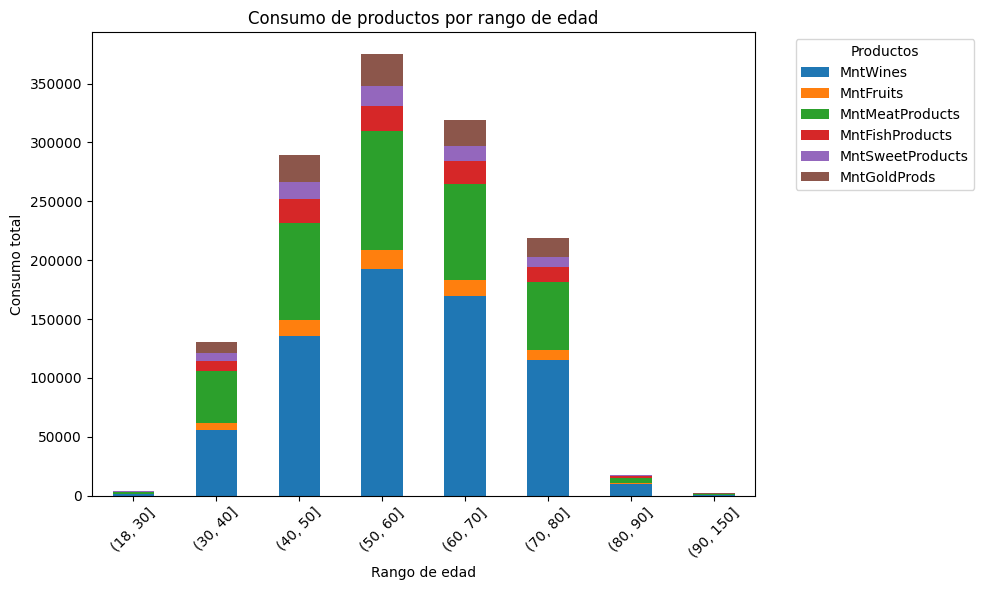

In [46]:
#Productos aplilados por edad mas consumidos y menos consumidos

consumo_por_edad.plot(kind="bar", stacked=True, figsize=(10,6))

plt.title("Consumo de productos por rango de edad")
plt.xlabel("Rango de edad")
plt.ylabel("Consumo total")
plt.legend(title="Productos", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Estrategias de marketing campañas dirigidas a clientes de 50–59 años enfocado en nuestros clientes.  son idea pueden ser mejorada segun su opinion.Nuestro enfoque principal está dirigido al grupo de edad entre 50 y 59 años, que representa el mayor porcentaje de nuestra base de clientes.
Son adultos con ingresos estables, alta capacidad de gasto y una marcada preferencia por la calidad, confianza y beneficios prácticos.
Estrategia:
•	Priorizar campañas enfocadas en este segmento.
•	Fortalecer el vínculo emocional con mensajes que transmitan confianza, cercanía y servicio personalizado.
•	Acompañar al cliente en cada etapa de su experiencia de compra.
•	Promover los productos más consumidos por este grupo, como vinos, carnes y otros artículos de alta demanda.
•	Presentar recomendaciones basadas en el comportamiento de compra de otros clientes similares.
•	Mantener una comunicación activa y personalizada para que siempre se sienta acompañados a través de:
•	WhatsApp
•	Email marketing
•	Facebook
•	Instagram 
•	Implementar programas especiales de recompensas en sus compras.
•	Organizar eventos exclusivos para fortalecer la relación y fomentar la permanencia.



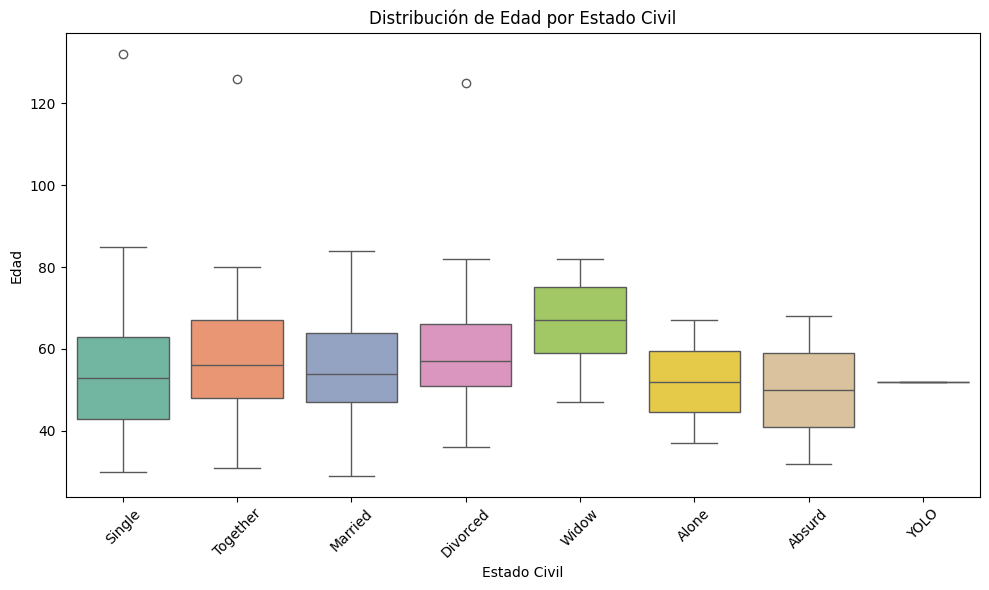

In [51]:
plt.figure(figsize=(10,6))

sns.boxplot(
    x="Marital_Status",
    y="Edad",
    data=df,
    hue="Marital_Status",  # asigna la paleta a cada categoría
    dodge=False,           # evita desplazar los boxplots
    palette="Set2",
    legend=False           # elimina la leyenda extra generada por hue
)

# Títulos y etiquetas
plt.title("Distribución de Edad por Estado Civil")
plt.xlabel("Estado Civil")
plt.ylabel("Edad")
plt.xticks(rotation=45)

# Ajuste de márgenes y mostrar
plt.tight_layout()
plt.show()

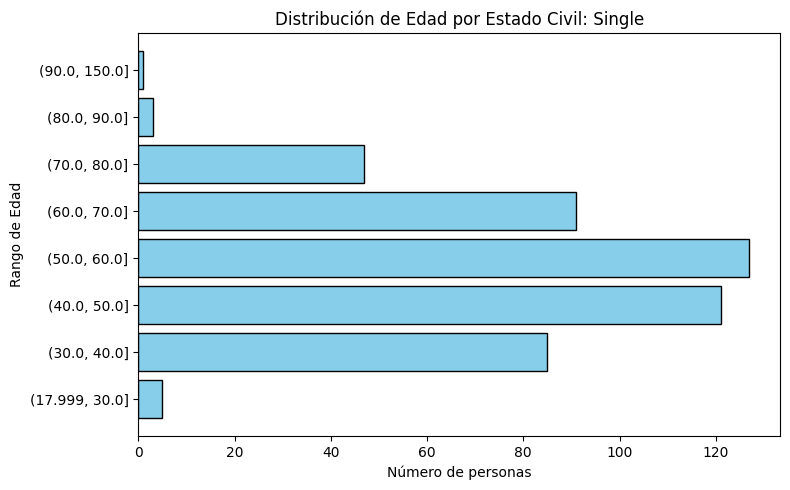

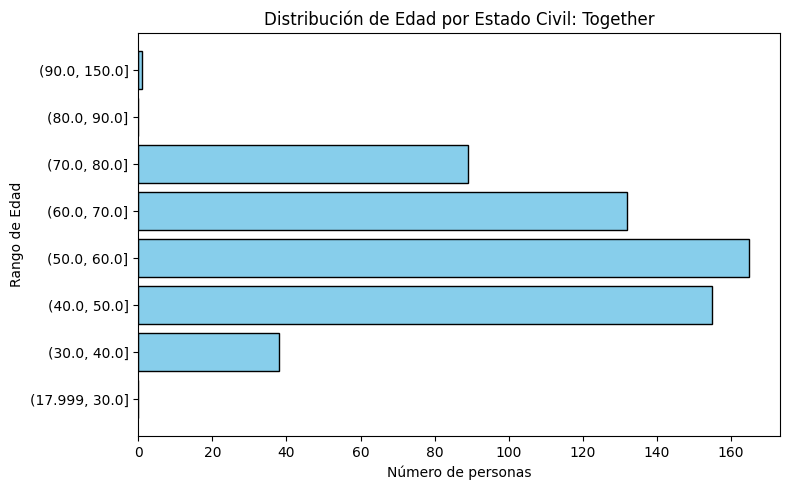

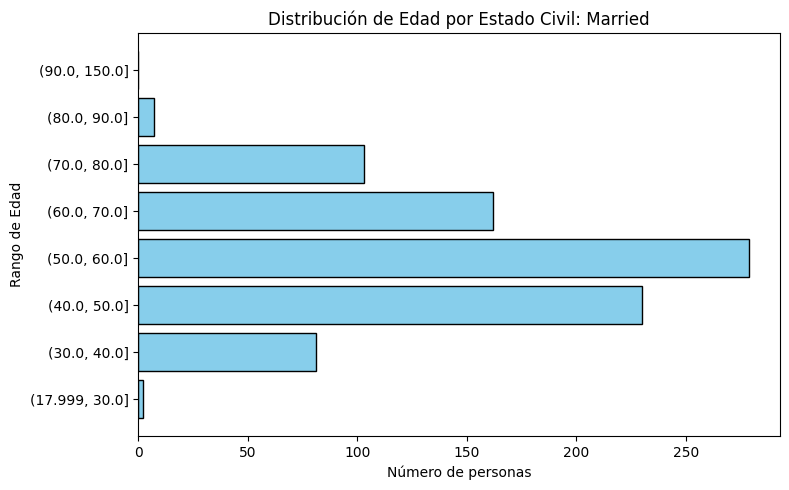

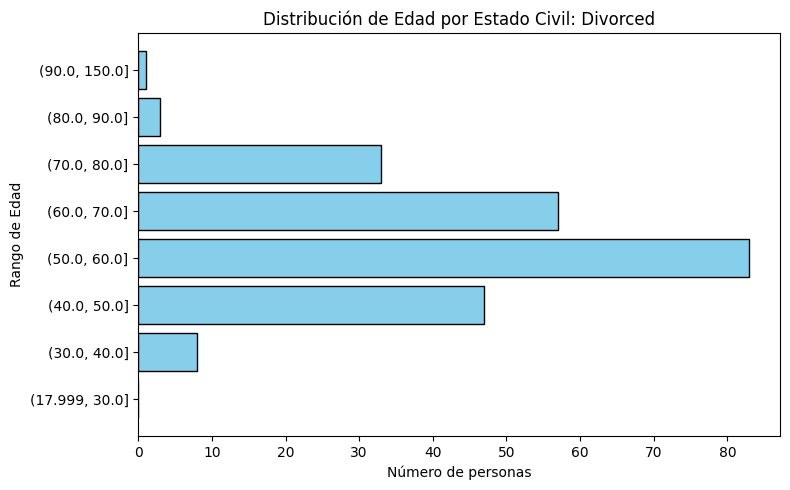

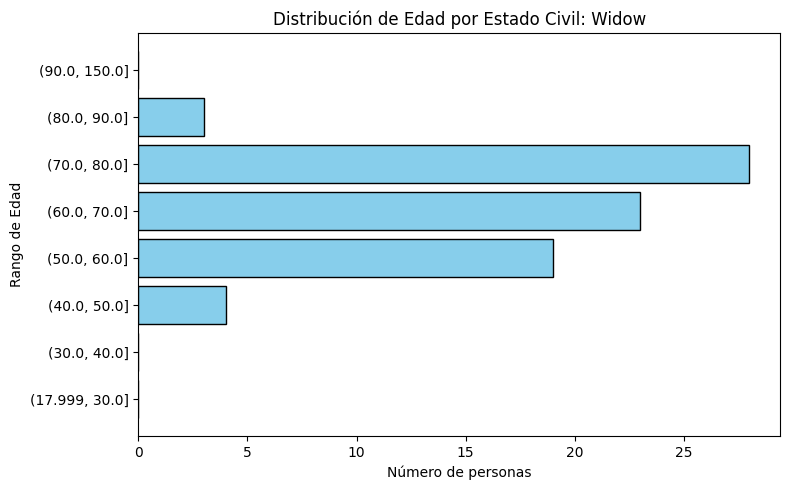

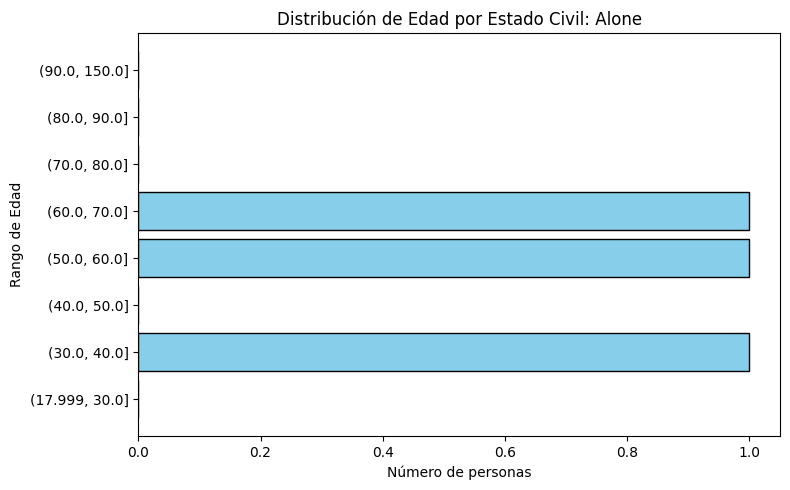

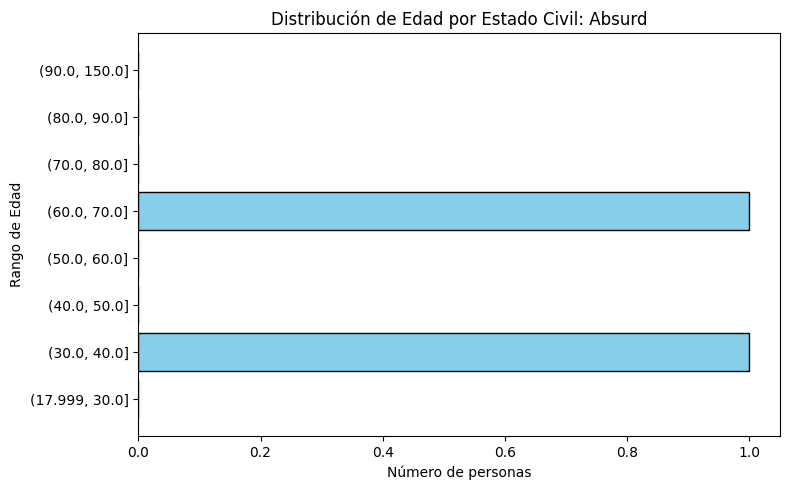

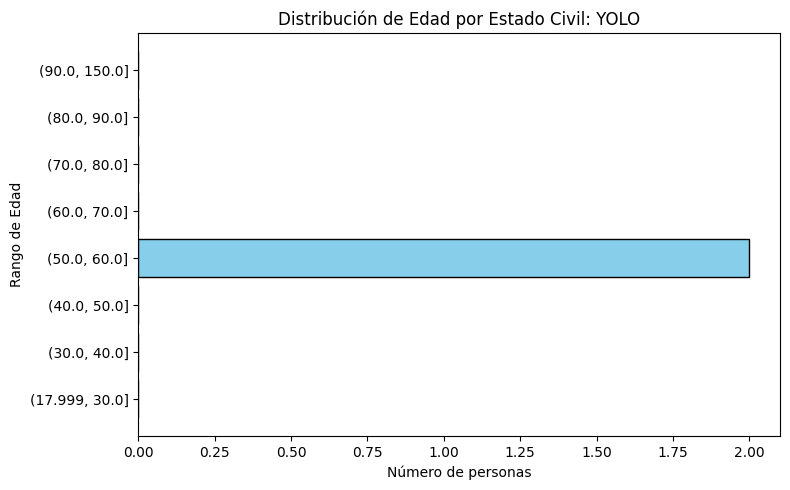

In [58]:
# Asegurarse de tener la columna Rango_Edad
df["Rango_Edad"] = pd.cut(df["Edad"], bins=[18,30,40,50,60,70,80,90,150], include_lowest=True)

# Lista de estados civiles y rangos de edad
estados = df["Marital_Status"].unique()
rangos = df["Rango_Edad"].cat.categories  # si es categoría

# Iterar sobre cada estado civil
for estado in estados:
    # Filtrar el estado civil
    grupo_estado = df[df["Marital_Status"] == estado]
    
    # Contar cantidad de personas por rango de edad
    conteo = grupo_estado["Rango_Edad"].value_counts().reindex(rangos, fill_value=0)
    
    # Gráfico de barras horizontales
    plt.figure(figsize=(8,5))
    plt.barh(conteo.index.astype(str), conteo, color="skyblue", edgecolor="black")
    
    plt.xlabel("Número de personas")
    plt.ylabel("Rango de Edad")
    plt.title(f"Distribución de Edad por Estado Civil: {estado}")
    plt.tight_layout()
    plt.show()

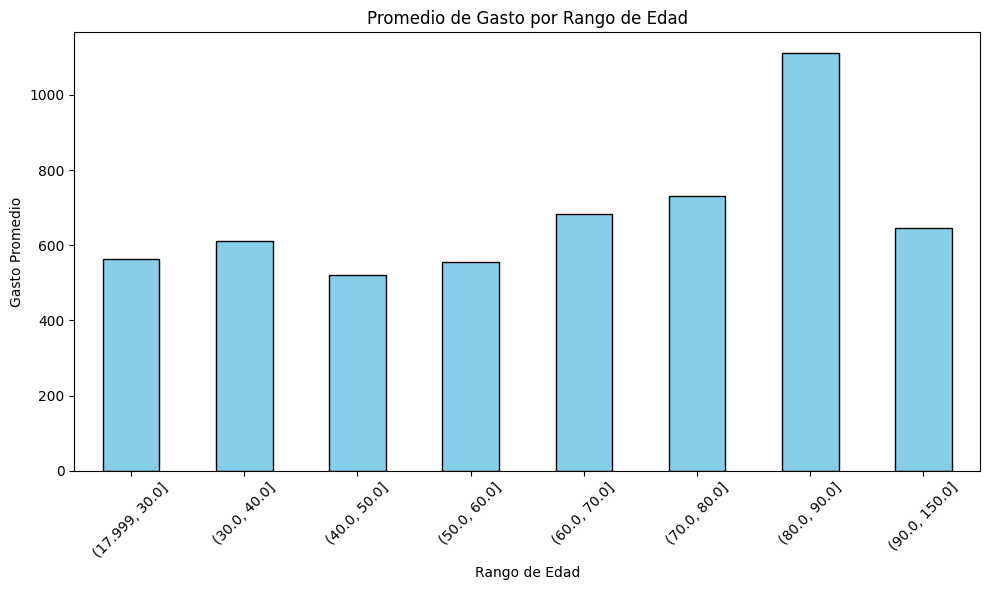

In [59]:
# Promedio de gasto por rango de edad
df["Gasto_Total"] = df[productos].sum(axis=1)
promedio_gasto = df.groupby("Rango_Edad", observed=True)["Gasto_Total"].mean()

plt.figure(figsize=(10,6))
promedio_gasto.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Promedio de Gasto por Rango de Edad")
plt.xlabel("Rango de Edad")
plt.ylabel("Gasto Promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()